
# 🏷️ Análise de Qualidade de Vinhos

Este projeto tem como objetivo analisar um conjunto de dados de vinhos e construir modelos preditivos capazes de estimar a qualidade de um vinho com base em suas características físico-químicas.

---

## 📌 Etapas do Projeto

1. **Coleta de Dados**
2. **Análise Exploratória dos Dados (EDA)**
3. **Modelagem Preditiva**
4. **Avaliação de Modelos**
5. **Conclusão**



## 📥 Coleta de Dados

Os dados utilizados neste projeto referem-se a características químicas de diferentes tipos de vinhos e suas respectivas classificações de qualidade.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

sns.set(style='whitegrid')
%matplotlib inline

In [4]:
df = pd.read_csv('winequality-red.csv', sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5



## 📊 Análise Exploratória dos Dados

A seguir, realizamos uma análise gráfica e estatística das principais variáveis para entender os padrões presentes no conjunto de dados.


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [10]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

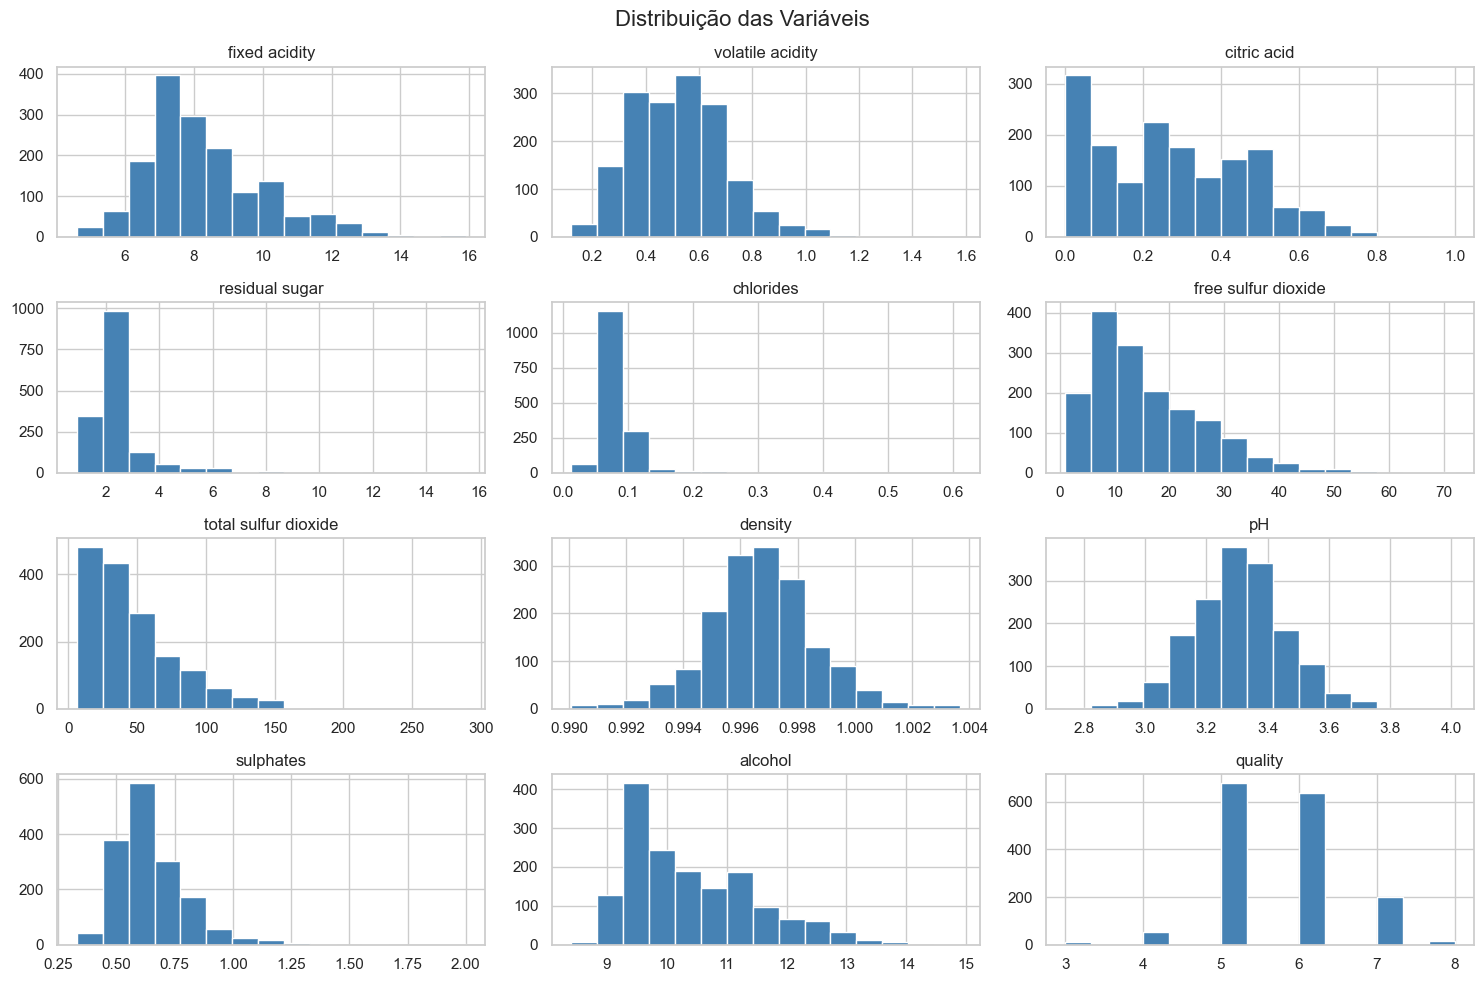

In [12]:
df.hist(bins=15, figsize=(15, 10), color='steelblue')
plt.suptitle("Distribuição das Variáveis", fontsize=16)
plt.tight_layout()
plt.show()

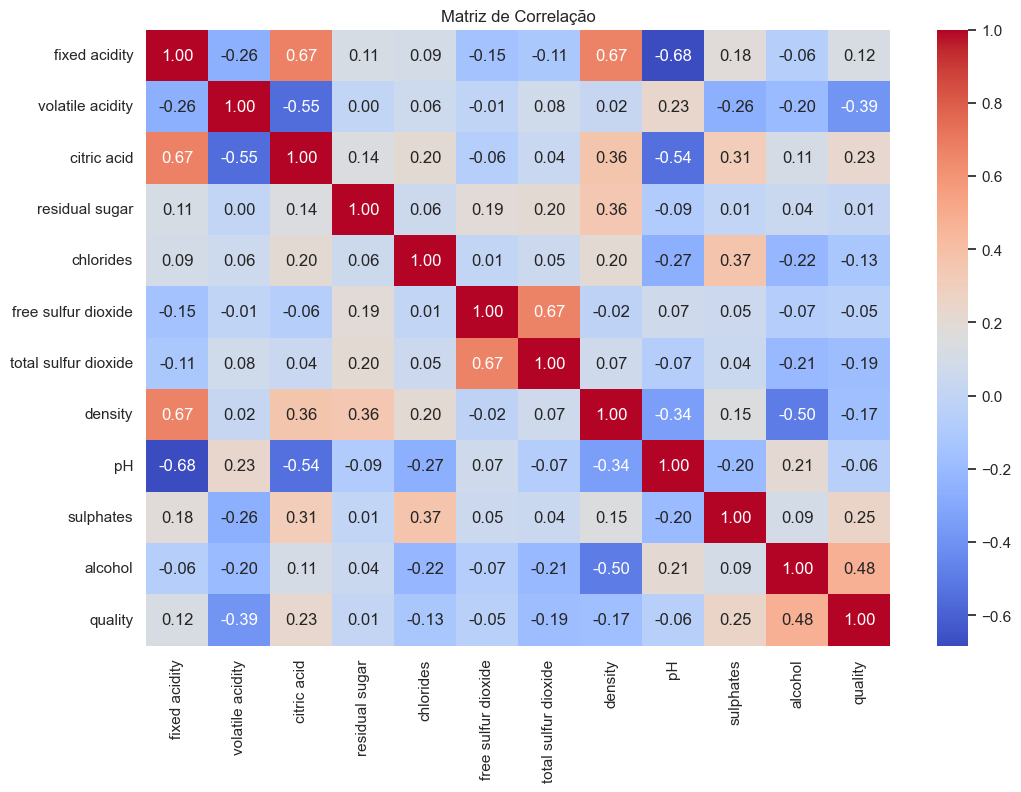

In [14]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlação")
plt.show()

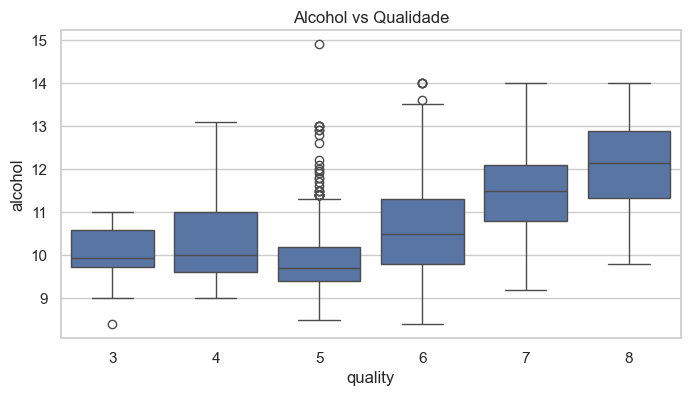

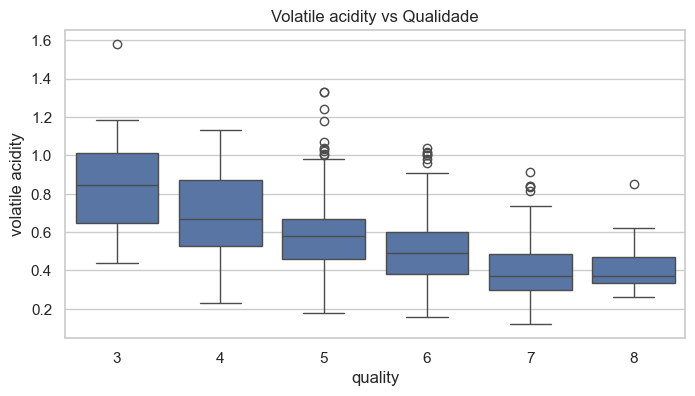

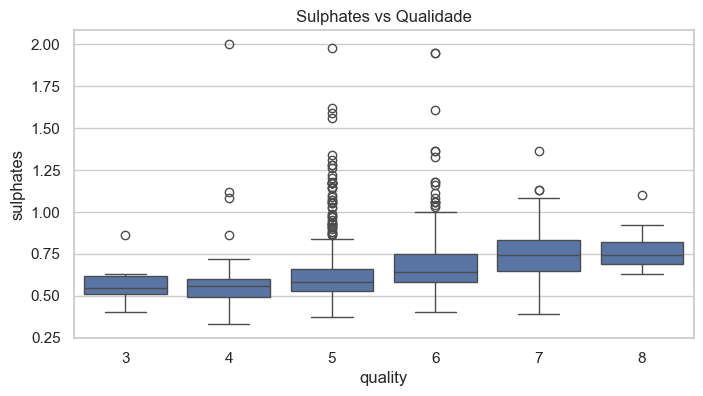

In [16]:
# Relação entre algumas variáveis e a qualidade do vinho
features = ['alcohol', 'volatile acidity', 'sulphates']
for col in features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='quality', y=col, data=df)
    plt.title(f'{col.capitalize()} vs Qualidade')
    plt.show()


## 🤖 Modelagem Preditiva

Nesta etapa, utilizamos modelos de regressão para prever a qualidade do vinho com base em suas características físico-químicas.


In [19]:
# Separando features e target
X = df.drop('quality', axis=1)
y = df['quality']

# Dividindo entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Regressão Linear
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Linear Regression:")
print("R² Score:", r2_score(y_test, y_pred_lr))
print("RMSE:", mean_squared_error(y_test, y_pred_lr, squared=False))


Linear Regression:
R² Score: 0.40318034127962277
RMSE: 0.6245199307980125



## 📈 Avaliação dos Modelos

Avaliamos os modelos usando métricas como o Erro Quadrático Médio (RMSE) e o Coeficiente de Determinação (R²).


In [24]:
# Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Regressor:")
print("R² Score:", r2_score(y_test, y_pred_rf))
print("RMSE:", mean_squared_error(y_test, y_pred_rf, squared=False))

Random Forest Regressor:
R² Score: 0.5390429623873638
RMSE: 0.5488516420673258



## ✅ Conclusão

Os modelos foram capazes de prever a qualidade dos vinhos com uma performance razoável. Modelos como o Random Forest apresentaram melhor desempenho. Estudos futuros podem considerar otimização de hiperparâmetros e uso de outras técnicas.
